This notebook is dedicated to Li Wenliang, "a healthy society should have more than one voice".



We evaluate a possible range for the infectivity, or $R_0$, of the Coronavirus Covid19. Specifically, we focus on how to extrapolate existing data from China in order to get a complete dataset that we can use for estimation.

We need to keep in mind that $R_0$ is not an absolute metric, it is one based on the virus as much as the society it infects. So different countries may experience distinct $R_0$s for the same epidemic. This notebook is a framework for estimating $R_0$ from data.


In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving DXYArea.csv to DXYArea (2).csv


In [0]:
covid19_china = pd.read_csv('DXYArea.csv')

In [0]:
covid19_china.head(50)

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
0,亚洲,Asia,约旦,Jordan,约旦,Jordan,955010,53,0,1,0,2020-03-19 00:31:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,亚洲,Asia,越南,Vietnam,越南,Vietnam,952011,75,0,16,0,2020-03-19 00:16:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,亚洲,Asia,巴基斯坦,Pakistan,巴基斯坦,Pakistan,953006,289,0,1,0,2020-03-19 00:12:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,北美洲,North America,古巴,Cuba,古巴,Cuba,974004,10,0,0,1,2020-03-19 00:09:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,亚洲,Asia,巴勒斯坦,Palestine,巴勒斯坦,Palestine,955014,44,0,0,0,2020-03-19 00:05:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,欧洲,Europe,西班牙,Spain,西班牙,Spain,965015,13716,0,1081,598,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,欧洲,Europe,德国,Germany,德国,Germany,963003,11312,0,135,26,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,亚洲,Asia,伊朗,Iran,伊朗,Iran,955007,17361,0,5710,1135,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,北美洲,North America,美国,United States of America,美国,United States of America,971002,7111,0,74,117,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,亚洲,Asia,韩国,Korea,韩国,Korea,951004,8413,0,1540,84,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


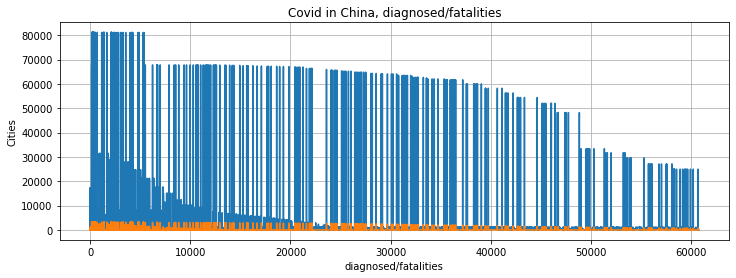

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,4))

plt.plot(covid19_china.province_confirmedCount)
plt.plot(covid19_china.province_deadCount)

plt.title('Covid in China, diagnosed/fatalities')
plt.ylabel('Cities')
plt.xlabel('diagnosed/fatalities')
plt.grid(True)

Now drop the columns 'province_suspectedCount', 'city_suspectedCount', 'province_zipCode', 'city_zipCode', and display the dataframe.

In [0]:
covid19_china.drop(['province_suspectedCount','city_suspectedCount','province_zipCode','city_zipCode'], axis=1,inplace=True)

In [0]:
len(covid19_china)

60740

Do some Data healing to remove all NaN entries

In [0]:
covid19_china = covid19_china.dropna()

In [0]:
len(covid19_china)

48357

What are the city names ?

In [0]:
covid19_china.cityEnglishName.values

array(['Wuhan', 'Xiaogan', 'Ezhou', ..., 'Fuxin', 'Chaoyang', 'Benxi'],
      dtype=object)

How many rows refer to the city of Wuhan ?

In [0]:
covid19_wuhan = covid19_china[covid19_china["cityEnglishName"]=="Wuhan"]
covid19_wuhan

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_confirmedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_confirmedCount,city_curedCount,city_deadCount
149,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,武汉,Wuhan,50005.0,40073.0,2490.0
478,亚洲,Asia,中国,China,湖北省,Hubei,67800,56886,3122,2020-03-18 12:12:22,武汉,Wuhan,50005.0,40032.0,2490.0
497,亚洲,Asia,中国,China,湖北省,Hubei,67800,56885,3122,2020-03-18 12:11:15,武汉,Wuhan,50005.0,40032.0,2490.0
1325,亚洲,Asia,中国,China,湖北省,Hubei,67800,56883,3122,2020-03-18 09:19:13,武汉,Wuhan,50004.0,39220.0,2480.0
2095,亚洲,Asia,中国,China,湖北省,Hubei,67799,56003,3111,2020-03-17 19:47:01,武汉,Wuhan,50004.0,39220.0,2480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59493,亚洲,Asia,中国,China,湖北省,Hubei,24953,1124,699,2020-02-08 15:01:55,武汉,Wuhan,13603.0,698.0,545.0
59616,亚洲,Asia,中国,China,湖北省,Hubei,24953,1123,699,2020-02-08 14:06:11,武汉,Wuhan,13603.0,698.0,545.0
59899,亚洲,Asia,中国,China,湖北省,Hubei,24953,1121,699,2020-02-08 13:01:21,武汉,Wuhan,13603.0,698.0,545.0
60178,亚洲,Asia,中国,China,湖北省,Hubei,24953,1119,699,2020-02-08 11:49:24,武汉,Wuhan,13603.0,698.0,545.0


In [0]:
import seaborn as sns
plt.figure(figsize=(14,12))
ax = plt.gca()
plt.figure(num=None, figsize=(10, 20), dpi=80, facecolor='w', edgecolor='k')
latest_wuhan.plot(kind='line',  y='city_confirmedCount', ax=ax)
latest_wuhan.plot(kind='line',  y='city_curedCount', ax=ax)
latest_wuhan.plot(kind='line',  y='city_deadCount', ax=ax)